In [1]:
%load_ext autoreload
%autoreload 2
from simplet5 import SimpleT5
import pandas as pd
from sklearn.metrics import accuracy_score

Global seed set to 42


In [3]:
import pandas as pd 
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained("google/t5-v1_1-base")
all_set = pd.read_csv("./data5/statista_train.csv", header=0)


In [18]:
valid_set = pd.read_csv("./data/statista_valid.csv", header=0)
print(valid_set.head())

                                              recipe                                            caption
0  Generate: {"chart_type": "bar", "title": "Numb...  As of the survey period, the number of fiction...
1  Generate: {"chart_type": "bar", "title": "Glob...  In 2020, global GDP per capita amounted to abo...
2  Score: {"chart_type": "line", "title": "Aggrav...                                              false
3  Generate: {"chart_type": "bar", "title": "Perc...  A survey from 2019 found that 84 percent of ad...
4  Score: {"chart_type": "line", "title": "Foreca...                                              false


In [10]:
len(tokenizer("Hello World and Me")["input_ids"])

5

In [4]:
all_set['token_len_recipe'] = all_set['recipe'].apply(lambda x: len(tokenizer(x)["input_ids"]))
all_set['token_len_caption'] = all_set['caption'].apply(lambda x: len(tokenizer(x)["input_ids"]))


Token indices sequence length is longer than the specified maximum sequence length for this model (893 > 512). Running this sequence through the model will result in indexing errors


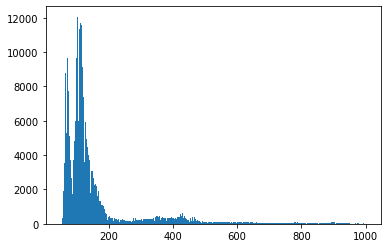

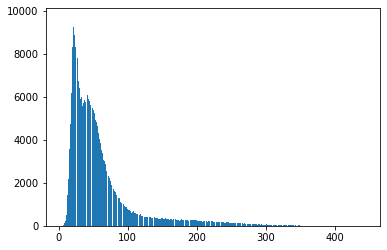

157.25941783374915
59.96241066724979
999
444
51
3


In [16]:
#draw histogram 0 to 500 with token_len_recipe 
import matplotlib.pyplot as plt
plt.hist(all_set[all_set.token_len_recipe < 1000]['token_len_recipe'], bins=500)
plt.show()
plt.hist(all_set[all_set.token_len_caption < 1000]['token_len_caption'], bins=500)
plt.show()

#get average
print(all_set[all_set.token_len_recipe < 1000]['token_len_recipe'].mean())
print(all_set[all_set.token_len_recipe < 1000]['token_len_caption'].mean())

#get max
print(all_set[all_set.token_len_recipe < 1000]['token_len_recipe'].max())
print(all_set[all_set.token_len_recipe < 1000]['token_len_caption'].max())

#get min
print(all_set[all_set.token_len_recipe < 1000]['token_len_recipe'].min())
print(all_set[all_set.token_len_recipe < 1000]['token_len_caption'].min())

